# (Ford Gobike Data Presentation )
## by (Zakarea Sabi)

## Investigation Overview

> in this presentation will show what insight about this dataset I discoverd  

## Dataset Overview

> The data consisted of duration_sec and attributes about 193,907. The attributes is measurements such as start station name, start station latitude, and start station longitude.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_new = pd.read_csv('df_new.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)
that most of the trips take time between 5 to 10 minutes,

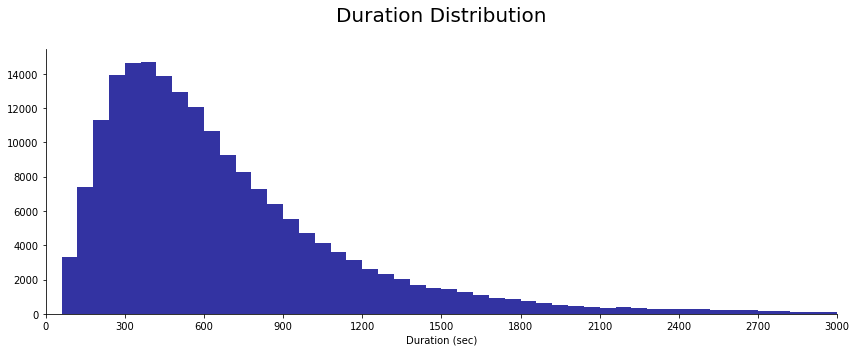

In [3]:
binsize = 60
bins = np.arange(0, df_new['duration_sec'].max()+binsize, binsize)
# Plotting
fig, axes = plt.subplots(figsize = (12,5))
plt.hist(df_new.duration_sec, bins = bins, color='darkblue', alpha=0.8);

# Aesthetic wrangling
plt.xticks(ticks = [x for x in range(0,3600,300)])
plt.title('Duration Distribution\n', size=20)
plt.xlabel('Duration (sec)')
plt.xlim(0,3000)
sb.despine(fig)
plt.tight_layout();

## (Visualization 2)

> this figure shows us the daily number of trips for subscribers concentrated between 8 and 9 am and between 4 pm and 6 pm thats evidence that they use to go to work

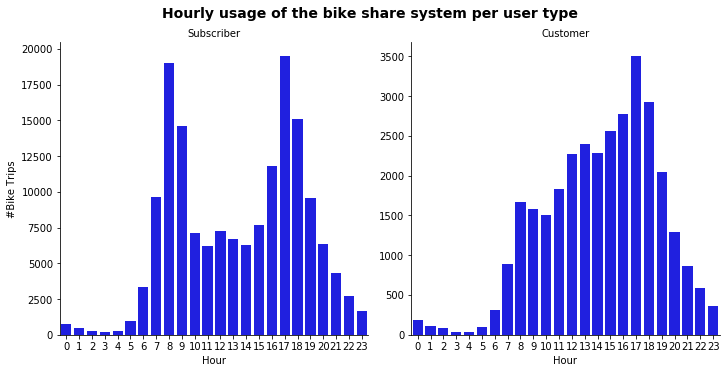

In [4]:
g = sb.catplot(data=df_new, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = 'blue')
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='bold');

## (Visualization 3)

customers use the bike more in the weekends and concentreted between 11 am and 4 pm on sunday
in the other hand subscribers use the bike mostly on weekdays and concentrated in 7 am to 9 am , also between 4 pm and 5 pm.¶

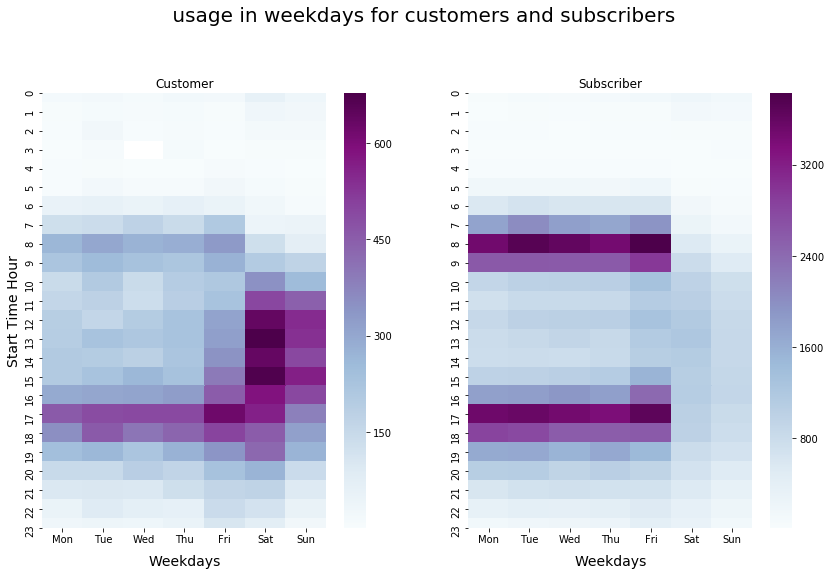

In [5]:
df_new['start_time_weekday'] = pd.Categorical(df_new['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(14,8))
plt.suptitle(' usage in weekdays for customers and subscribers', fontsize=20, y=1.03)

# heatmap for customers
plt.subplot(1, 2, 1)

df_customer = df_new.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="BuPu",fmt='d')

plt.title("Customer", y=1.015)
plt.xlabel('Weekdays',fontsize=14, labelpad=10)
plt.ylabel('Start Time Hour',fontsize=14)

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_new.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu",fmt='d')

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekdays',fontsize=14, labelpad=10)
plt.ylabel('');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

# (Visualization 4)
##### customer usage is flactuted while subscirbers is more consistant ,also this grahp shows that both of them their usage increase in weekend(Sat and sun

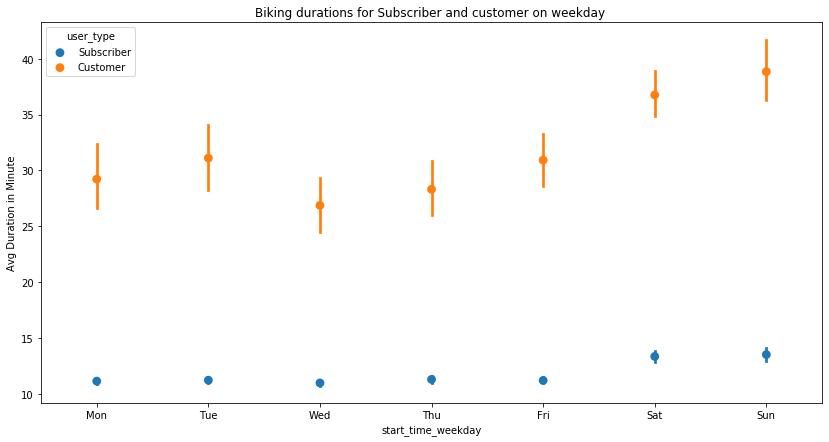

In [6]:
fig = plt.figure(figsize = [14,7])
sb.pointplot(data=df_new, x='start_time_weekday', y='duration_min', hue='user_type',linestyles="");
plt.title('Biking durations for Subscriber and customer on weekday ');
plt.xlabel('start_time_weekday');
plt.ylabel('Avg Duration in Minute');